In [1]:
import pandas as pd
from ggplot import *

project_id = "the-d-team-164512"

In [13]:
query = """\
SELECT
  Patient_ID
  , year
  , SUM(CASE WHEN illness = 'Lipids' THEN 1 ELSE 0 END) AS Lipids
  , SUM(CASE WHEN illness = 'Hypertension' THEN 1 ELSE 0 END) AS Hypertension
  , SUM(CASE WHEN illness = 'Depression' THEN 1 ELSE 0 END) AS Depression
  , SUM(CASE WHEN illness = 'Diabetes' THEN 1 ELSE 0 END) AS Diabetes
  , SUM(CASE WHEN illness = 'Heart Failure' THEN 1 ELSE 0 END) AS Heart_Failure
  , SUM(CASE WHEN illness = 'Epilepsy' THEN 1 ELSE 0 END) AS Epilepsy
  , SUM(CASE WHEN illness = 'Chronic Obstructive Pulmonary Disease (COPD)' THEN 1 ELSE 0 END) AS COPD
  , SUM(CASE WHEN illness = 'Osteoporosis' THEN 1 ELSE 0 END) AS Osteoporosis
  , SUM(CASE WHEN illness = 'Anti-Coagulant' THEN 1 ELSE 0 END) AS Anti_Coagulant
  , SUM(CASE WHEN illness = 'Urology' THEN 1 ELSE 0 END) AS Urology
  , SUM(CASE WHEN illness = 'Immunology' THEN 1 ELSE 0 END) AS Immunology
FROM
  (
  SELECT
    t.patient_id AS Patient_ID
    , c.ChronicIllness AS illness
    , YEAR(DATE(t.Dispense_Week)) AS year
  FROM
    dthon.transactions t
    JOIN dthon.drug_lookup d
      ON t.Drug_ID = d.MasterProductID
    LEFT JOIN dthon.chronic_illness_lookup c
      ON c.MasterProductID = d.MasterProductID
    JOIN dthon.kaggle_baseline k
      ON t.patient_id = k.Patient_ID
  WHERE
    t.patient_id BETWEEN 279201 AND 558352
    AND k.Diabetes = 1.0
  )
GROUP BY
  Patient_ID
  , year
ORDER BY
  Patient_ID
  , year
LIMIT 10000
"""

df_db_year_ill = pd.read_gbq(query, project_id)
df_db_year_ill.year = df_db_year_ill.year.apply(pd.to_datetime, format='%Y')

df_db_year_ill.head(3)

Waiting for job to complete...


,Patient_ID,year,Lipids,Hypertension,Depression,Diabetes,Heart_Failure,Epilepsy,COPD,Osteoporosis,Anti_Coagulant,Urology,Immunology
0,279207,2011,6,0,6,7,0,0,0,0,0,0,0
1,279207,2012,12,0,6,9,0,0,0,0,0,0,0
2,279207,2013,12,0,6,7,0,0,0,0,0,0,0


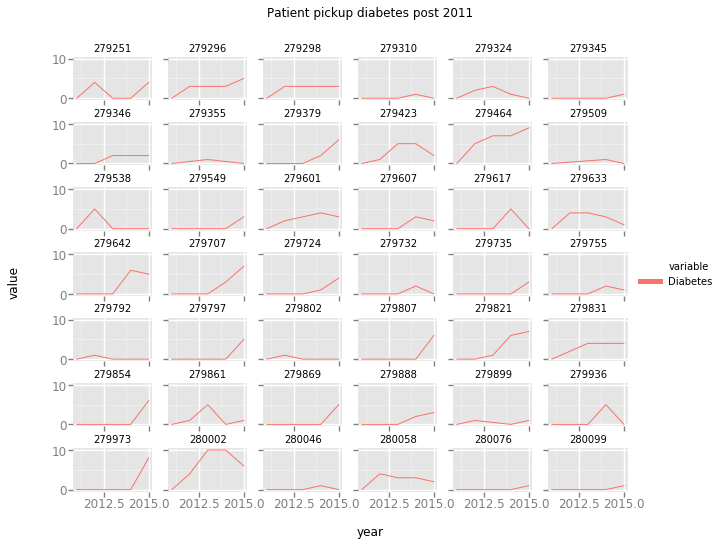

<ggplot: (297933958)>


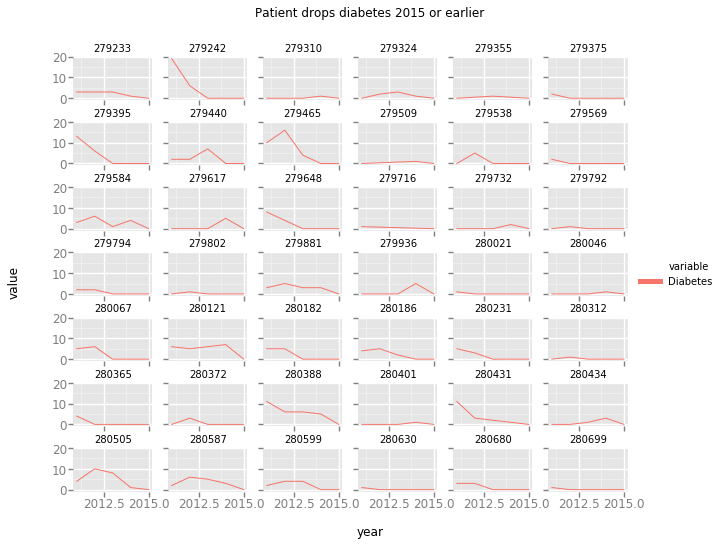

<ggplot: (-9223372036528378410)>


In [138]:
def plot_pats(pat_ids, title):
    df_subset = df_db_year_ill[df_db_year_ill.Patient_ID.isin(pat_ids)]
    df_subset_lng = pd.melt(df_subset,
                                 id_vars = ['year', 'Patient_ID'],
                                 value_vars=['Diabetes'])
    #                              value_vars=['Lipids', 'Hypertension', 'Depression', 'Diabetes',
    #                                          'Heart_Failure', 'Epilepsy', 'COPD', 'Osteoporosis',
    #                                          'Anti_Coagulant', 'Urology', 'Immunology'])
    print(ggplot(
        aes(x='year', y='value', colour='variable'),
        data=df_subset_lng) +\
        geom_line() +\
        labs(title = title) +\
        facet_wrap('Patient_ID'))#, ncol = 2)

pat_zero_diabetes_2011 = df_db_year_ill[
    ((df_db_year_ill.Diabetes == 0) &\
     (df_db_year_ill.year == 2011))].Patient_ID.unique()[0 : 42]
plot_pats(pat_zero_diabetes_2011, 'Patient pickup diabetes post 2011')

pat_zero_diabetes_2015 = df_db_year_ill[
    ((df_db_year_ill.Diabetes == 0) &\
     (df_db_year_ill.year == 2015))].Patient_ID.unique()[0 : 42]
plot_pats(pat_zero_diabetes_2015, 'Patient drops diabetes 2015 or earlier')

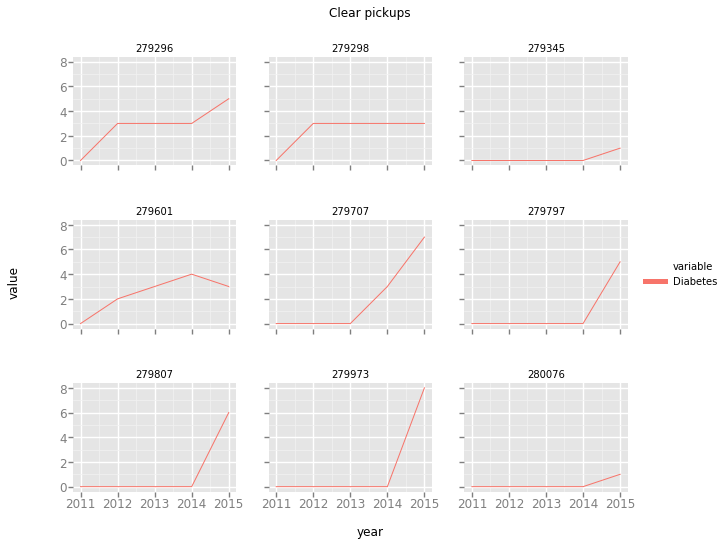

<ggplot: (308523903)>


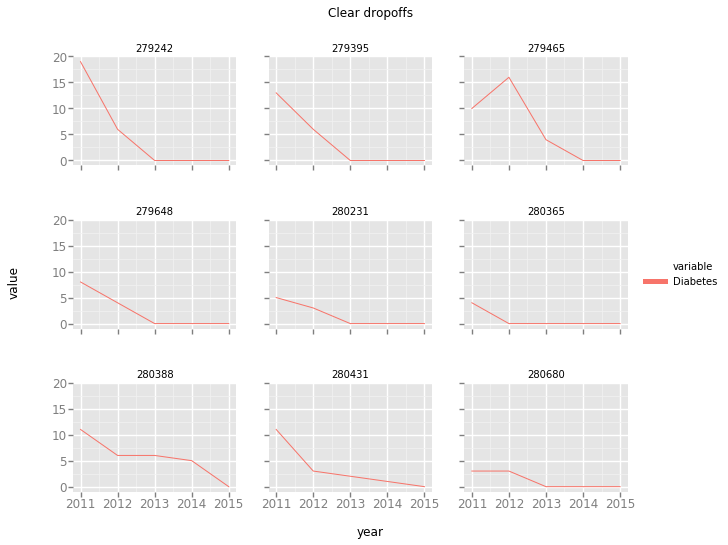

<ggplot: (-9223372036554559281)>


In [139]:
plot_pats([279296, 279298, 279345, 279601, 279807, 279707, 279797, 279973, 280076], 'Clear pickups')

plot_pats([279242, 279465, 279395, 279648, 280231, 280365, 280388, 280431, 280680], 'Clear dropoffs')